### Regressão linear simples

#### Importando bibliotecas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# warning
from yellowbrick.regressor import ResidualsPlot
import warnings
warnings.filterwarnings('ignore')

#### Carregamento da base de dados

In [33]:
base = pd.read_csv('./data/cars.csv', sep=',')
base.shape

(50, 3)

In [34]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [35]:
base = base.drop(['Unnamed: 0'], axis=1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### Definições das variáveis X e Y, X distância é a variável independente e Y velocidade é a variável dependente

In [36]:
x = base.iloc[:,1].values
y = base.iloc[:,0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

#### Calculo da correlação entre X e Y

In [37]:
correlacao = np.corrcoef(x, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

#### Formato de matriz com uma coluna a mais

In [38]:
x = x.reshape(-1, 1)
# criação do modelo e treinamento(fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

#### Visualização dos coeficientes

In [39]:
modelo.intercept_

8.283905641787172

#### Inclinação

In [40]:
modelo.coef_

array([0.16556757])

#### Geração do gráfico com os pontos reais e previsões

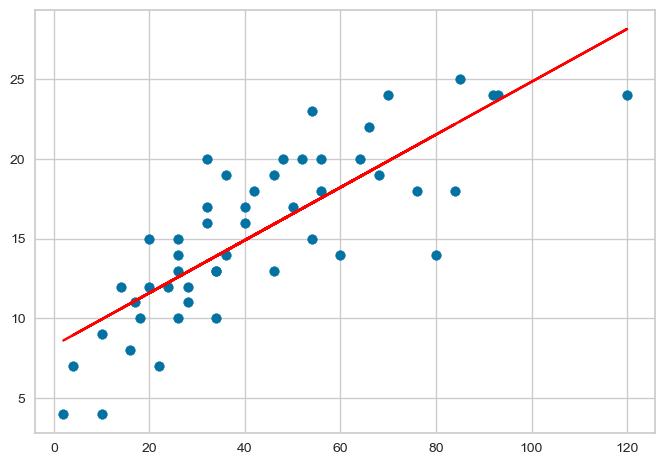

In [41]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

#### Previsão da 'distância de 22 pés' usando a fórmula manual 
interceptação  * inclinação  * valor de dist

* Qual a velocidade se levou para parar 22 pés?

In [42]:
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

#### Previsão utilizando a função sklearn

In [43]:
modelo.predict([[22]])

array([11.92639228])

#### Gráfico para visualizar os residuais

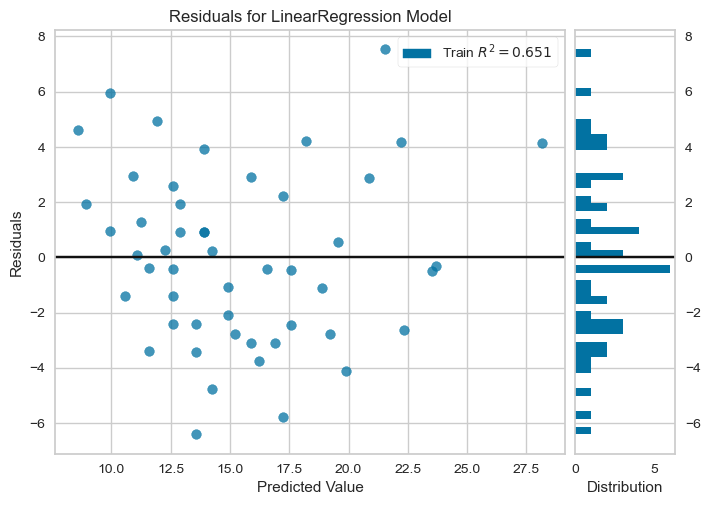

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.show()